In [1]:
import pandas as pd

In [4]:
testdf = pd.read_json('config_files/test.json')
testrawdf = pd.read_json('config_files/test.raw.json')
print(testdf.shape, testrawdf.shape)

(812, 13) (812, 13)


In [104]:
testdf.columns

Index(['sites', 'task_id', 'require_login', 'storage_state', 'start_url',
       'geolocation', 'intent_template', 'instantiation_dict', 'intent',
       'require_reset', 'eval', 'intent_template_id', 'string_note'],
      dtype='object')

In [7]:
testdf.to_csv('test.csv', index=False)

In [109]:
testdf.intent_template_id.value_counts()

intent_template_id
332    10
279     7
366     7
371     7
352     6
       ..
161     1
782     1
781     1
120     1
151     1
Name: count, Length: 190, dtype: int64

In [108]:
testdf.to_csv("examinetestdf.csv")

In [38]:
testdf['sites'] = testdf['sites'].astype(str)

In [43]:
gitlab_list = list(testdf[testdf['sites'] == "['gitlab']"].index)

In [8]:
failed = [658, 176, 475, 567, 422, 662, 398, 727, 418, 480, 746, 316, 479, 750, 357, 394, 414, 156, 415, 395, 751, 478, 182, 747, 317, 481, 419, 730, 663, 566, 136, 177, 570, 659, 756, 668, 392, 412, 557, 445, 296, 577, 259, 170, 561, 664, 449, 448, 389, 736, 665, 560, 537, 171, 258, 576, 297, 444, 413, 106, 556, 669, 393, 405, 452, 350, 311, 294, 447, 105, 555, 410, 685, 390, 406, 451, 754, 168, 742, 312, 484, 579, 559, 670, 563, 133, 308, 522, 172, 349, 173, 309, 562, 132, 558, 578, 485, 743, 169, 755, 450, 391, 104, 554, 411, 446, 295, 334, 660, 420, 565, 135, 477, 174, 318, 748, 441, 103, 553, 416, 729, 396, 569, 752, 181, 744, 314, 178, 482, 179, 483, 44, 745, 315, 180, 753, 568, 397, 102, 552, 417, 293, 749, 175, 476, 564, 134, 661]

In [9]:
failed.sort()
failed

[44,
 102,
 103,
 104,
 105,
 106,
 132,
 133,
 134,
 135,
 136,
 156,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 258,
 259,
 293,
 294,
 295,
 296,
 297,
 308,
 309,
 311,
 312,
 314,
 315,
 316,
 317,
 318,
 334,
 349,
 350,
 357,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 405,
 406,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 422,
 441,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 522,
 537,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 576,
 577,
 578,
 579,
 658,
 659,
 660,
 661,
 662,
 663,
 664,
 665,
 668,
 669,
 670,
 685,
 727,
 729,
 730,
 736,
 742,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756]

In [45]:
print(gitlab_list,)

[44, 45, 46, 102, 103, 104, 105, 106, 132, 133, 134, 135, 136, 156, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 205, 206, 207, 258, 259, 293, 294, 295, 296, 297, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 314, 315, 316, 317, 318, 339, 340, 341, 342, 343, 349, 350, 357, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 522, 523, 524, 525, 526, 527, 533, 534, 535, 536, 537, 567, 568, 569, 570, 576, 577, 578, 579, 590, 591, 592, 593, 594, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 736, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 783, 784, 785, 786, 787, 788, 789, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811]


In [ ]:
41, 456
80, 121, 127, 197, 270, 331, 400, 417, 427, 439, 501, 577, 529, 607, 621, 662, 694

In [1]:
import re
import pandas as pd


def extract_result(log_file_name):
    results = []
    test_indices = []
    # Define a regular expression pattern to match the lines with results
    test_index_pattern = r'\[Config file\]: config_files/(\d+).json'

    result_pattern = re.compile(r'\[Result\] \((\w+)\) config_files/(\d+)\.json')

    # Define a regular expression pattern to match lines with OpenAI Errors and Unhandled Errors
    error_pattern = re.compile(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d+ - INFO - \[.*Error\] (.+)')

    with open(log_file_name, 'r') as log_file:
        lines = log_file.readlines()

    current_test_index = None

    for line in lines:
        test_index_match = re.search(test_index_pattern, line)
        if test_index_match:
            current_test_index = int(test_index_match.group(1))
            continue

        result_match = result_pattern.search(line)
        if result_match:
            result = result_match.group(1)
            results.append(result)
            test_indices.append(current_test_index)
        else:
            error_match = error_pattern.search(line)
            if error_match:
                error_message = error_match.group(1)
                results.append(f'Error: {error_message}')
                test_indices.append(current_test_index)
                
    df = pd.DataFrame({'task_id': test_indices, 'result': results})
    return df


def read_logfiles(logpaths):
    with open(logpaths, 'r') as log_paths:
        lines = log_paths.readlines()
    df_lists = []

    for logfile in lines:
        temp = extract_result(logfile.strip("\n"))
        df_lists.append(temp)
    
    df_sum = pd.concat(df_lists, ignore_index=True, axis = 0)
    
    merged_df = pd.merge(testdf, df_sum, on='task_id', how='inner')

    return df_sum, merged_df



In [5]:
%cd /Users/guozhitong/webarena/
deberta_results, deberta_meta = read_logfiles("/Users/guozhitong/webarena/cache/91206_gpt35_16k_cot_na_deberta/log_files.txt") 

/Users/guozhitong/webarena


In [6]:
deberta_results.result.value_counts()

result
FAIL                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [41]:
baseline_results, baseline_meta = read_logfiles("/Users/guozhitong/webarena/results/log_files.txt") 

In [57]:
err_analysis, err_analysis_meta = read_logfiles("/Users/guozhitong/webarena/error_analysis/log_files.txt") 

In [58]:
df1 = baseline_results.sort_index()
df2 = err_analysis.sort_index()
df1.set_index('task_id', inplace=True)
df2.set_index('task_id', inplace=True)
df2.sort_index(inplace=True)
df1.update(df2)
df1

,result
task_id,
0,PASS
1,FAIL
2,FAIL
3,FAIL
4,FAIL
...,...
807,FAIL
808,FAIL
809,FAIL


In [59]:
df1.result.value_counts()

result
FAIL    758
PASS     54
Name: count, dtype: int64

In [60]:
df1.result.value_counts()['PASS']/df1.shape[0]

0.0665024630541872

In [61]:
baseline_meta = pd.merge(testdf, df1, on='task_id', how='inner')
baseline_meta.to_csv("baseline_metadata.csv")

In [62]:
err_analysis.result.value_counts()

result
FAIL    86
PASS    10
Name: count, dtype: int64

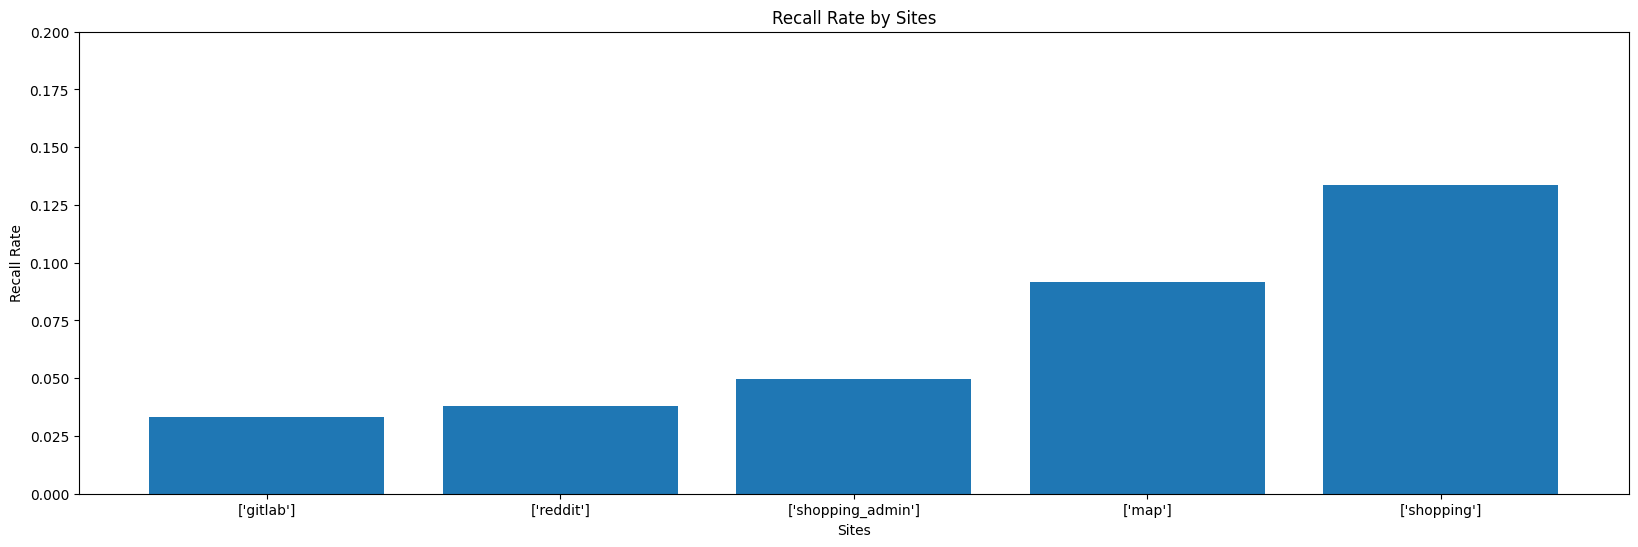

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("baseline_metadata.csv", index_col=0)
recall_rate = df[df['result'] == 'PASS'].groupby('sites').size() / df.groupby('sites').size()
recall_rate = recall_rate.sort_values()

plt.figure(figsize = (20,6))
plt.bar(recall_rate.index, recall_rate.values)
plt.xlabel('Sites')
plt.ylabel('Recall Rate')
plt.title('Recall Rate by Sites')
plt.ylim(0, 0.2) 
plt.show()

In [64]:
recall_rate

sites
['gitlab']                   0.033333
['reddit']                   0.037736
['shopping_admin']           0.049451
['map']                      0.091743
['shopping']                 0.133690
['gitlab', 'reddit']              NaN
['gitlab', 'wikipedia']           NaN
['map', 'shopping_admin']         NaN
['map', 'wikipedia']              NaN
['reddit', 'gitlab']              NaN
['shopping', 'reddit']            NaN
['wikipedia', 'map']              NaN
dtype: float64

In [23]:
df[df['result'] == 'PASS'].groupby('sites').size()

sites
['gitlab']             3
['map']               10
['reddit']             4
['shopping']          25
['shopping_admin']     9
dtype: int64

In [24]:
df.groupby('sites').size()

sites
['gitlab', 'reddit']          10
['gitlab', 'wikipedia']        6
['gitlab']                   180
['map', 'shopping_admin']      2
['map', 'wikipedia']           1
['map']                      109
['reddit', 'gitlab']           8
['reddit']                   106
['shopping', 'reddit']         5
['shopping']                 187
['shopping_admin']           182
['wikipedia', 'map']          16
dtype: int64

In [29]:
df2

NameError: name 'df2' is not defined

In [ ]:
df.groupby(['sites',]).size()